# Неделя 4 задача 2
#### В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.
#### Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=true).
#### Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).
#### Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

### Сгенерируем выборку объёма 1000 из экспоненциального распределения, $\lambda = 1$

##### Экспоненциальное (или показательное) распределение — абсолютно непрерывное распределение, моделирующее время между двумя последовательными свершениями одного и того же события.
[Wikipedia](https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

$E[x]=\frac{1} {\lambda}$

$D[x]=\frac{1} {\lambda^2}$


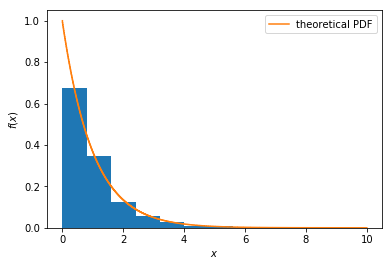

In [2]:
# генерируем выборку объёма 1000,строим гистограмму выборки, теоретическую плотность распределения
exp=sts.expon(loc=0,scale=1)
exp_st=exp.rvs(1000)
x = np.linspace (0,10,1000)
plt.hist(exp_st, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
pdf=exp.pdf(x)
plt.step(x, pdf, label='theoretical PDF')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='best')

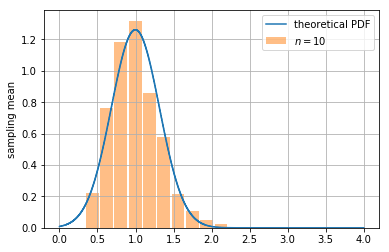

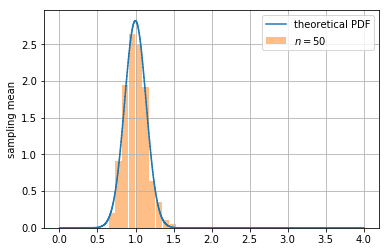

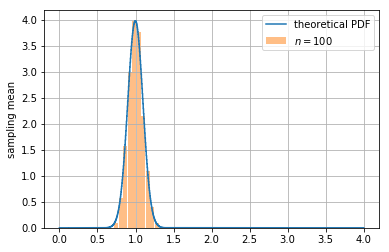

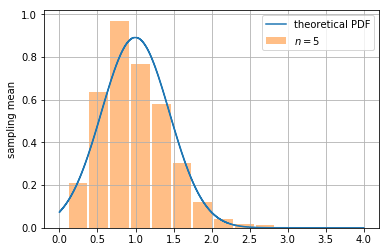

In [5]:
# генерирую 1000 выборок объёма 5, 10, 50 и строим гистограммы распределений их выборочных средних,плотности нормального распределения 
lmbd=1.0
x = np.linspace (-0,4,1000)
exp=sts.expon(scale=lmbd)
for p in [5, 10, 50,100]:
   muss=[]
   for a in range (1000):
    exp_st=exp.rvs(p)
    sr=sum(exp_st)/p
    muss.append(sr)
   plt.figure(p)
   norm_rv = sts.norm(loc=lmbd,scale=(lmbd/p)**0.5)
   pdf = norm_rv.pdf(x)
   plt.step(x, pdf, label='theoretical PDF')
   plt.hist(muss, normed=True,histtype='bar', rwidth=0.9,alpha=0.5,label = "$n=%s$" % p)
   plt.legend()
   plt.ylabel('sampling mean')
   plt.grid(True)

## Вывод
Централная предельная теорема достаточно точно приближает среднее выборки. С увеличением объема выборки, график гистограммы становится более плотным, с меньшим разбросом и поэтому плотность нормального распределения более приближена, а значит увеличивается точность апроксимации